In [2]:
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [3]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np,cupy as cp, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=18)
rc('xtick', labelsize=18)
rc('ytick', labelsize=18)
rc('legend', fontsize=18)
import root_pandas,glob

import gc

def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'

import misc_util

import jupyterthemes as jt
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'


/home/sebouh/.local/lib/python3.8/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/home/sebouh/.local/lib/python3.8/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


In [4]:
print(os.listdir("simul/Pairs"))
dfs_mc = {a : root_pandas.read_root("simul/Pairs/MC_Pairs_D.root","D") for a in "D".split()}
#dfs_mc = {a : root_pandas.read_root("../CreatePairTuples/MC_Pairs_weighted_%s.root" %a,a) for a in "D".split()}



#dfs_mc = {a : root_pandas.read_root("/home/sebouh/CreatePairTuples/MC_Pairs_weighted_%s.root" %a,'dihadrons') for a in "D_2pi C_2pi".split()}

colors = {'D':'k','C':'r','Fe':'g','Pb':'b'}

['MC_Pairs_Pb.root', 'MC_Pairs_Fe.root', 'MC_Pairs_D.root', 'MC_Pairs_C.root']


In [5]:
import R2h_module
import imp
imp.reload(R2h_module)
for key in list(dfs_mc.keys()):
    if '_2pi' in key or '_pi_p' in key:
        continue
    print(f"\n\n{key}")
    dfs_mc[key] = R2h_module.applyCuts(dfs_mc[key], nomCuts=True)
    dfs_mc[key + '_2pi'] = R2h_module.applyCutsPair(dfs_mc[key],
                                                             nomCuts=True,h2Proton=False)
    dfs_mc[key + '_pi_p'] = R2h_module.applyCutsPair(dfs_mc[key],
                                                             nomCuts=True,h2Proton=True)
    #dfs_mc[key + '_pi_p'] = R2h_module.applyCutsPair(dfs_mc[key],
    #                                                         nomCuts=True,h2Proton=True)
    #dfs_mc[key].eval('h2_mass_TOF = h2_p/h2_Betta*sqrt(1-h2_Betta**2)', inplace=True)
    #dfs_mc[key].eval('h1_mass_TOF = h1_p/h1_Betta*sqrt(1-h1_Betta**2)', inplace=True)



D
Entries before cut  2380006
Q2>1.0 and Q2<4.0 2380006  (100.00  %)
0.2<h1_p<5.0  2379999  (100.00  %)
inelasticity < 0.85 2379999  (100.00  %)
h1_pid = pions (trigger) 780619  (32.80  %)
2.2 < nu <4.2 763757  (97.84  %)
10< h1_th<90 763754  (100.00  %)
Theta/P fiducial region selected for trigger 763754  (100.00  %)
Nom cuts for the trigger applied 370531  (48.51  %)
Starting election on dipion variables
This is Data
1.0< Q2 <4.0 370531  (100.00  %)
2.2 < nu < 4.2 370531  (100.00  %)
secondary hadrons are pions 167210  (45.13  %)
(h1_z+h2_z)<1.0 165385  (98.91  %)
(h1_pid*h2_pid)<0, opposite charge pions 143836  (86.97  %)
kinematic limits for h2_z 143567  (99.81  %)
kinematic limits for dphi 143376  (99.87  %)
kinematic limits for pair_mass 136460  (95.18  %)
leading hadrons are pions 136460  (100.00  %)
0.2<h2_p<5.0 136460  (100.00  %)
0.2<h1_p<5.0 136460  (100.00  %)
10<h2_th<90 135932  (99.61  %)
Theta/P fiducial region selected for secondary hadron 135932  (100.00  %)
10< h1_t

In [6]:
import os, os.path

path = 'images/particle_misid/'
if not os.path.isdir(path):
    os.mkdir(path)

0.24937655860349126
5.640612409347301
3.6303630363036308
1.3946587537091988
0.8849557522123894
1.481042654028436
0.24875621890547264
0.0
0.3798480607756897
0.6604784005712245
0.5090497737556561
0.8956796628029504
1.1425959780621573
0.8733624454148471
0.21634615384615385
0.37261294829995345
0.5867383005796691
0.8678358343879949
1.012809055704498
1.601423487544484
0.8
0.9879253567508233
1.2721104918827235
1.9212121212121211
2.4192041845694003
3.815153143471252
5.425448868071818
6.395348837209303


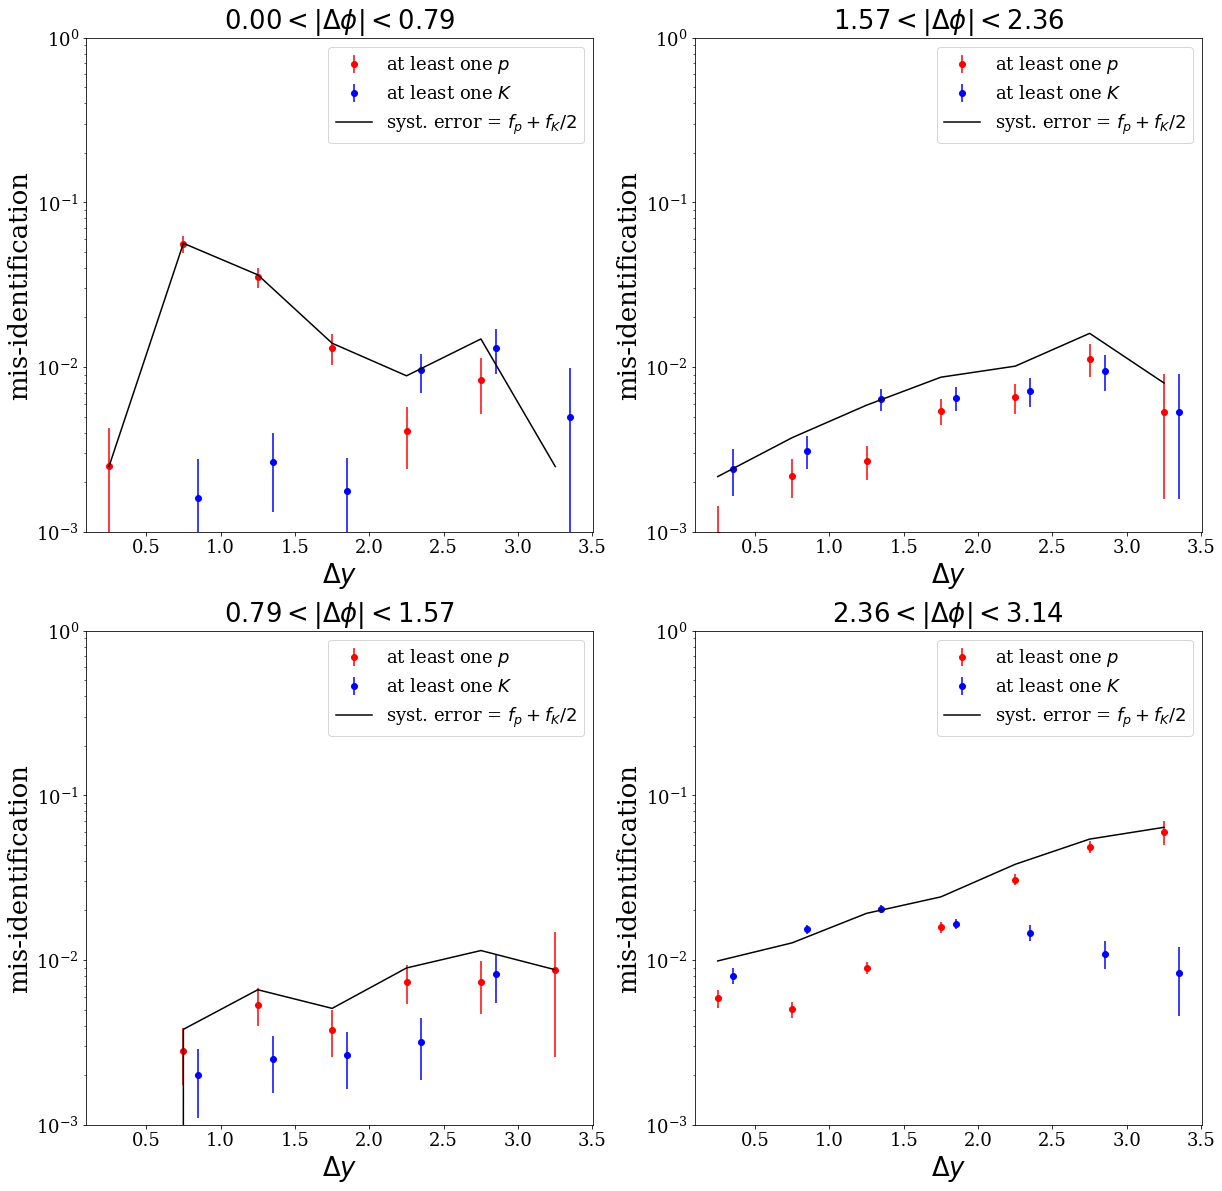

2.7977044476327118
1.017620543641579
0.4540451293340671
0.5223269151986891
0.679078284755074
1.1021876437863387
1.8024545989764957
2.73172569706104
3.415900918897323
4.810272134917593


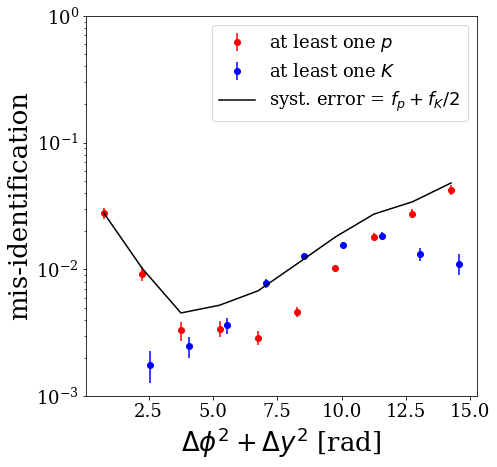

0.43859649122807015
1.2008733624454149
0.9162303664921465
0.68762278978389
0.9861519093579522
2.8670721112076456
3.278688524590164
0.0
0.4199475065616798
0.39573296627666893
0.7518796992481203
1.0828463389480922
2.212078651685393
2.142857142857143
0.5675675675675675
0.6647099447513812
0.7018755033943159
0.9968847352024922
1.1464573435240653
3.9375274967003957
5.603448275862069
2.907538998444267
4.099422076209203
4.871516083693548
5.205134658947898
5.937266616878267
8.326244151424927
5.394190871369295


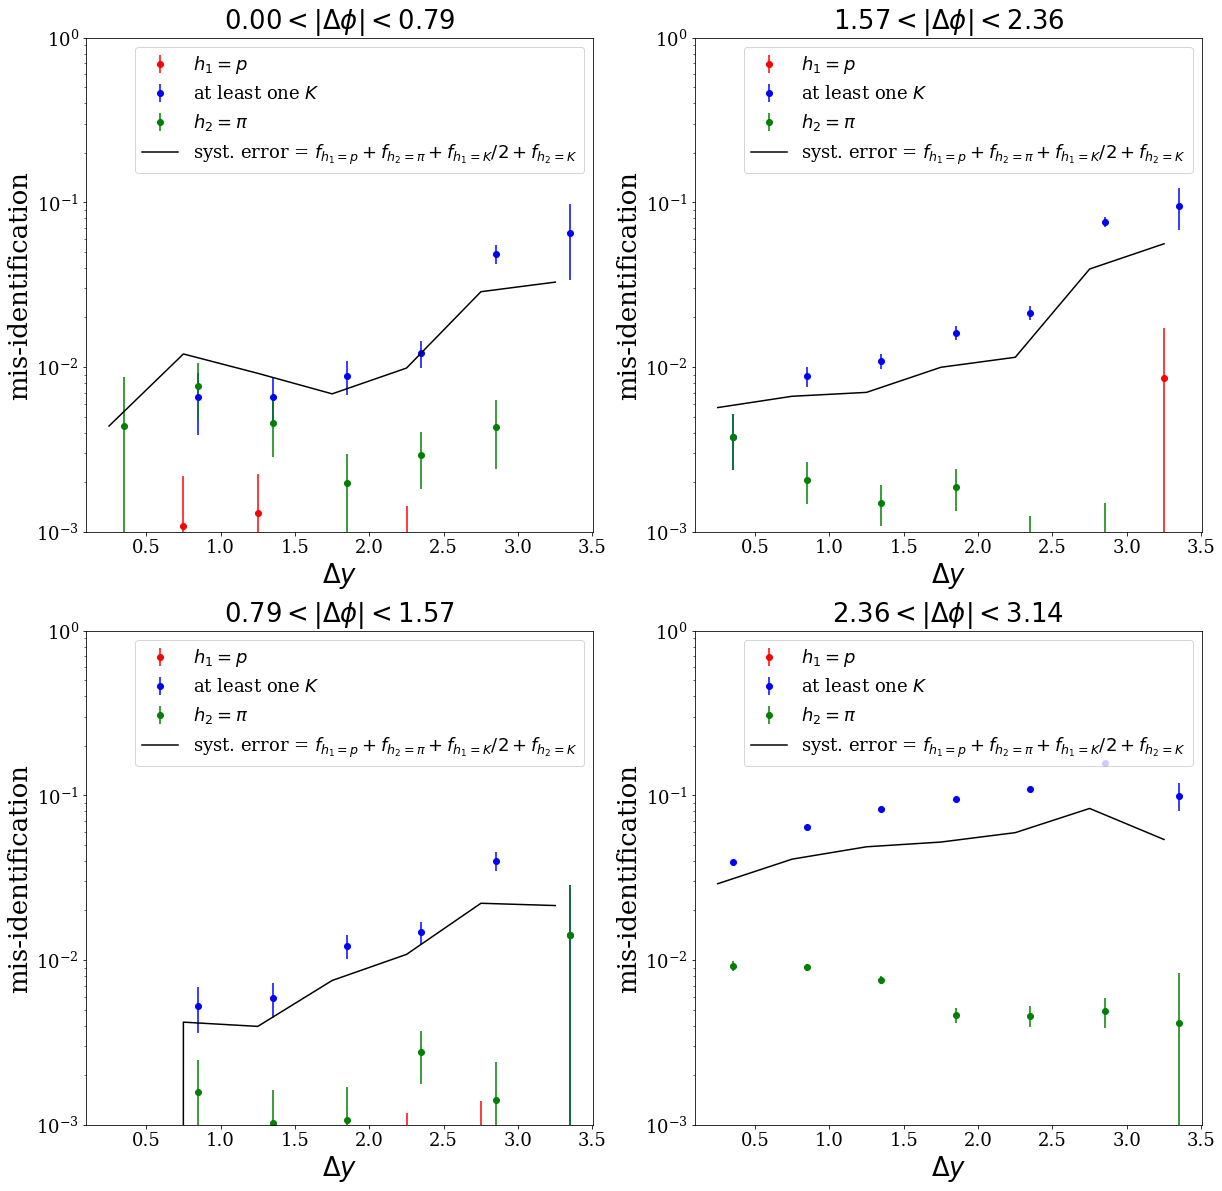

0.9191176470588236
0.5436971405557792
0.5837711617046117
0.6932282545242265
0.8955288607485146
1.1748141993260397
4.93765716680637
7.306914197310483
7.318967190836731
7.722694054908157


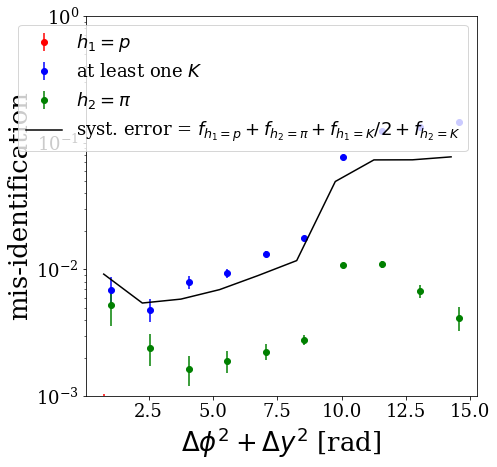

In [17]:

imp.reload(R2h_module)
def unc_plot(df,xvar='dphi',xlabel='$|\\Delta\\phi_{\\mathrm{cm}}|$',bins=None,nbins=4,
            expect='2pi'):
    #fig,axs = plt.subplots(1,1,figsize=(7,7))
    if 'pass_recon' in df.keys():
        df = df.query('pass_recon')
    
    yy = df.eval(xvar)
    if bins is None:
        bins = np.linspace(yy.quantile(.001), yy.quantile(.999), nbins)
    def weights(df):
        if 'weight_reco' in df.columns:
            return df.weight_reco/df.weight_reco
        else :
            return None
        #return df.weight_reco
    if expect=='2pi':
        nK,x = np.histogram(df.query('abs(h1_truth_pid) == 321 or abs(h2_truth_pid) == 321').eval(xvar),bins=bins,weights=weights(df.query('abs(h1_truth_pid) == 321 or abs(h2_truth_pid) == 321')))
        npr,x = np.histogram(df.query('abs(h1_truth_pid) == 2212 or abs(h2_truth_pid) == 2212').eval(xvar),bins=bins, weights=weights(df.query('abs(h1_truth_pid) == 2212 or abs(h2_truth_pid) == 2212')))
        ntot,x = np.histogram(df.eval(xvar),bins=bins,weights=weights(df))
        #print(ntot)
        y = (nK/2+npr)/ntot
        x = np.divide(np.add(x[1:],x[:-1]),2)
        plt.errorbar(x,npr/ntot, np.sqrt(npr*(ntot-npr)/ntot**3),color='r', label = "at least one $p$", 
                 linestyle='', marker='o')
        plt.errorbar(x+0.2*(x[1]-x[0]),nK/ntot, np.sqrt(nK*(ntot-nK)/ntot**3), color='b', label = "at least one $K$", 
                 linestyle='', marker='o')
        plt.errorbar(x,y,color='k', label = "syst. error = $f_p+f_K/2$")
    elif expect=='pi_p':
        nK1,x = np.histogram(df.query('abs(h1_truth_pid) == 321').eval(xvar),bins=bins,weights=weights(df.query('abs(h1_truth_pid) == 321')))
        nK2,x = np.histogram(df.query('abs(h2_truth_pid) == 321').eval(xvar),bins=bins,weights=weights(df.query('abs(h2_truth_pid) == 321')))
        npr,x = np.histogram(df.query('abs(h1_truth_pid) == 2212').eval(xvar),bins=bins, weights=weights(df.query('abs(h1_truth_pid) == 2212')))
        npi,x = np.histogram(df.query('abs(h2_truth_pid) == 211').eval(xvar),bins=bins, weights=weights(df.query('abs(h2_truth_pid) == 211')))
        ntot,x = np.histogram(df.eval(xvar),bins=bins,weights=weights(df))
    
        y = (nK1/2+nK2+npi+npr)/ntot
        x = np.divide(np.add(x[1:],x[:-1]),2)
        plt.errorbar(x,npr/ntot, np.sqrt(npr*(ntot-npr)/ntot**3),color='r', label = "$h_1=p$", 
                 linestyle='', marker='o')
        plt.errorbar(x+0.2*(x[1]-x[0]),(nK1+nK2)/ntot, np.sqrt((nK1+nK2)*(ntot-(nK1+nK2))/ntot**3), color='b', label = "at least one $K$", 
                 linestyle='', marker='o')
        #plt.errorbar(x+0.2*(x[1]-x[0]),(nK2)/ntot, np.sqrt((nK2)*(ntot-(nK2))/ntot**3), color='b', label = "at least one $K$", 
        #         linestyle='', marker='x')
        
        plt.errorbar(x+0.2*(x[1]-x[0]),(npi)/ntot, np.sqrt(npi*(ntot-npi)/ntot**3), color='g', label = "$h_2=\\pi$", 
                 linestyle='', marker='o')
        plt.errorbar(x,y,color='k', label = "syst. error = $f_{h_1=p}+f_{h_2=\\pi}+f_{h_1=K}/2+f_{h_2=K}$")
        
    plt.gca().set_ylim(.001,1)
    plt.gca().set_yscale('log')
    plt.gca().set_ylabel('mis-identification')
    plt.gca().set_xlabel(xlabel)
    plt.legend()
    for (xx,yy) in zip(x,y):
        print(yy*100,sep='\t')
    
dphiBins = 4
rows = 2
for df, label in (dfs_mc['D_2pi'],"2pi"), (dfs_mc['D_pi_p'],"pi_p"):
    fig,axs = plt.subplots(rows,dphiBins//rows,figsize=(20,20))
    partitions = np.linspace(0,np.pi,dphiBins+1)
    for i in range(len(partitions)-1):
        plt.sca(axs[i%rows][i//rows])
        unc_plot(df.query(f'dphi>{partitions[i]} and dphi<{partitions[i+1]}'),xvar='drap',xlabel='$\\Delta y$',
                 bins=np.linspace(0,3.5, 8), expect=label)
        plt.gca().set_title(f"${partitions[i]:.2f}<|\\Delta\\phi|<{partitions[i+1]:.2f}$")
    plt.savefig(f'images/particle_misid/misid_{label}_drap_vs_dphi.png',bbox_inches='tight')
    plt.show()
    
    fig,axs = plt.subplots(1,1,figsize=(7,7))
    unc_plot(df,xvar='dphi**2+drap**2',xlabel='$\\Delta\\phi^2+\\Delta y^2$ [rad]',
                 bins=np.linspace(0,15, 11), expect=label)
    plt.savefig(f'images/particle_misid/misid_{label}_hypot.png',bbox_inches='tight')
    plt.show()

In [8]:
particle_names = {11:'$e^\\pm$',13:'$\\mu$',211:'$\\pi$', 321:'$K^\\pm$', 2212:'$p/\\bar p$',9999:'unknown', -1:'tot. mis-id.'}
def idplot(slicevar,particle,target='D', slices=None, xlabel=None, ylabel=None, query=None,
           fillstyle=None,blankLabel=False,showLegend=True,nbins=10):
    for key in dfs_mc.keys():
        q = 'h1_truth_pid!=-9999 and h2_truth_pid!=-9999 and h2_T4>-999 and h2_z>0.05 and abs(h1_pid)==211'
        #/q+= "and nu<3.5 and nu>3.0"
        if '_' in key: continue
        if target not in key: continue
        df = dfs_mc[key+'_2pi'].query(q)
    
        if slices is None:
            yy = df.eval(slicevar)
            slices = np.linspace(yy.quantile(.005), yy.quantile(.995), nbins+1)
        
        if 'pass_recon' in df.keys():
            df = df.query('pass_recon')
        if query is not None:
            df = df.query(query)
            
        xx = df.eval(slicevar)
        
        
        xs = {}
        ys = {}
        dys = {}
        
        colors = {11:'k', 9999:'g',-1:'k',2212:'r',321:'b',11:'g',13:'y'}
        plotted_pids=[2212,321,11,-1]
        for j,truth_id in enumerate(plotted_pids):
            shift = (slices[1]-slices[0])*(j+1)/10 
            if truth_id == -1:
                shift = 0.0
            xs[truth_id] = []
            ys[truth_id] = []
            dys[truth_id] = []
            for i in range(len(slices)-1):
                df_slice = df.query(f'{slicevar}>{slices[i]} and {slicevar}<{slices[i+1]}')
                
                q_id = f'abs({particle}_truth_pid) == {truth_id}' if truth_id != -1\
                            else f'{particle}_truth_pid != {particle}_pid'
                n,d = len(df_slice.query(q_id)),len(df_slice)
                if d == 0:
                    continue
                xs[truth_id].append((slices[i]+slices[i+1])/2)
                ys[truth_id].append(n/d)
                dys[truth_id].append(np.sqrt(n*(d-n))/d**(3/2))
            if truth_id != -1:
                linestyle = ''
            else:
                linestyle='-'
            plt.errorbar(np.add(xs[truth_id],shift),
                         ys[truth_id],
                         dys[truth_id], marker='o',
                         linestyle=linestyle,
                             label=particle_names[truth_id] if not blankLabel else ' ',
                             color = colors[truth_id],
                         fillstyle=fillstyle)
    plt.gca().set_ylabel('fraction of events')
    plt.gca().set_xlabel(xlabel)
    plt.gca().set_ylim(1e-4,1)
    plt.gca().set_yscale('log')
    #plt.gca().axhline(0,color='0.7', linestyle='--')
    #plt.gca().axvline(0,color='0.7', linestyle='--')
    if showLegend:
        plt.legend()

In [135]:
def multipanel(slicevar, particles= 'h1 h2'.split(), titles='trigger associated'.split(),nbins=10, query='1==1',*varg,**kwarg):
    
    fig,axs = plt.subplots(2,len(particles), figsize=(6*len(particles), 10))
    for nucleus,fillstyle,label in ('D','full',True),:#('Pb','none',True):
        for i,particle in enumerate(particles):
            plt.sca(axs[0][i])
            plt.gca().set_title(titles[i])
            idplot(slicevar,particle,**kwarg, query=f'{particle}_pid == 211 and {query}', target=nucleus, 
                   fillstyle=fillstyle,blankLabel=not label, showLegend=(i==1),nbins=nbins)
            plt.gca().set_xlabel(None)
            plt.sca(axs[1][i])
            idplot(slicevar,particle,**kwarg, query=f'{particle}_pid == -211 and {query}', target=nucleus, 
                   fillstyle=fillstyle,blankLabel=not label,showLegend=False,nbins=nbins)
            if i != 0:
                axs[0][i].set_ylabel(None)
                axs[1][i].set_ylabel(None)
                
    axs[0][0].text(0,0.9,'identified as $\pi^+$',transform=axs[0][0].transAxes)
    axs[1][0].text(0,0.9,'identified as $\pi^-$',transform=axs[1][0].transAxes)
    fig.tight_layout()

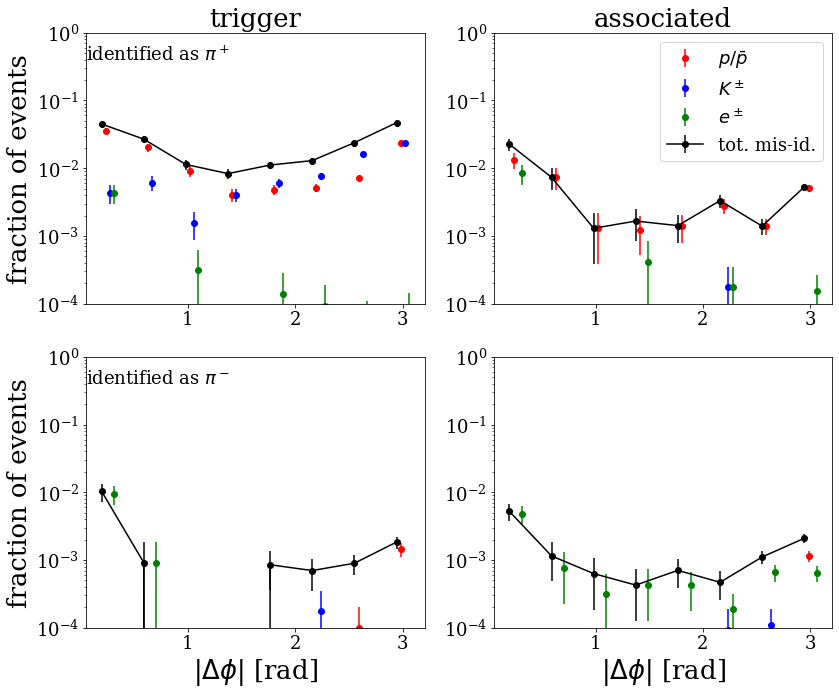

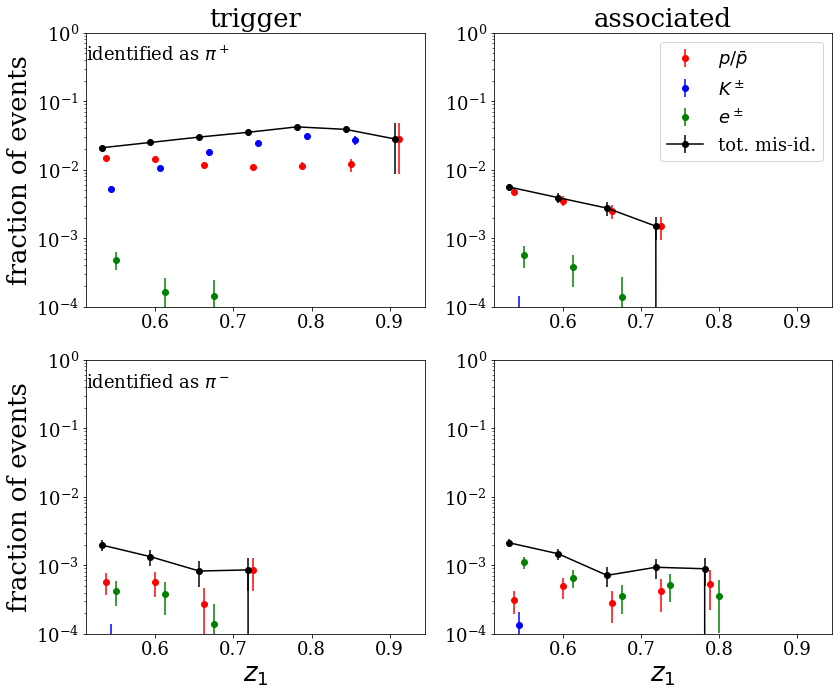

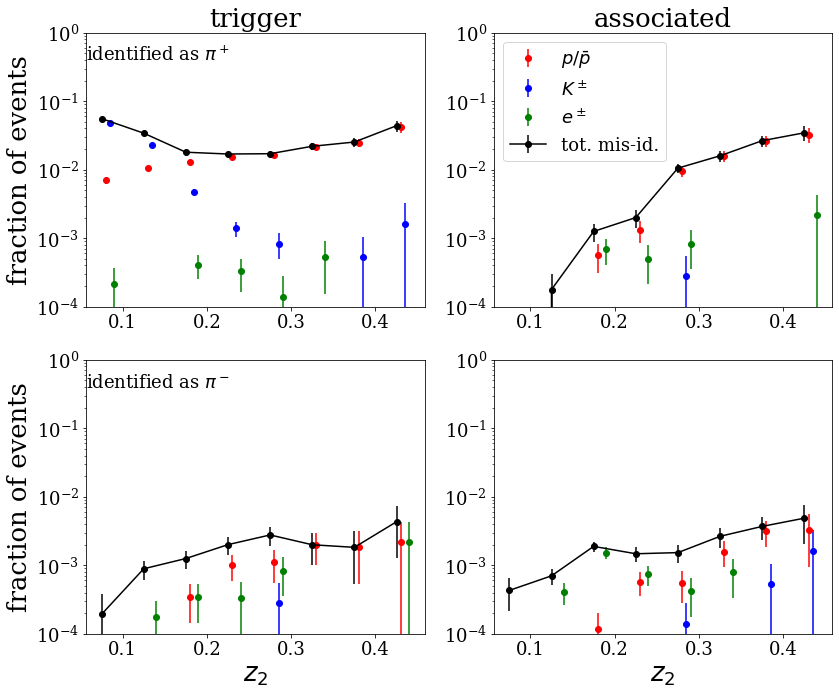

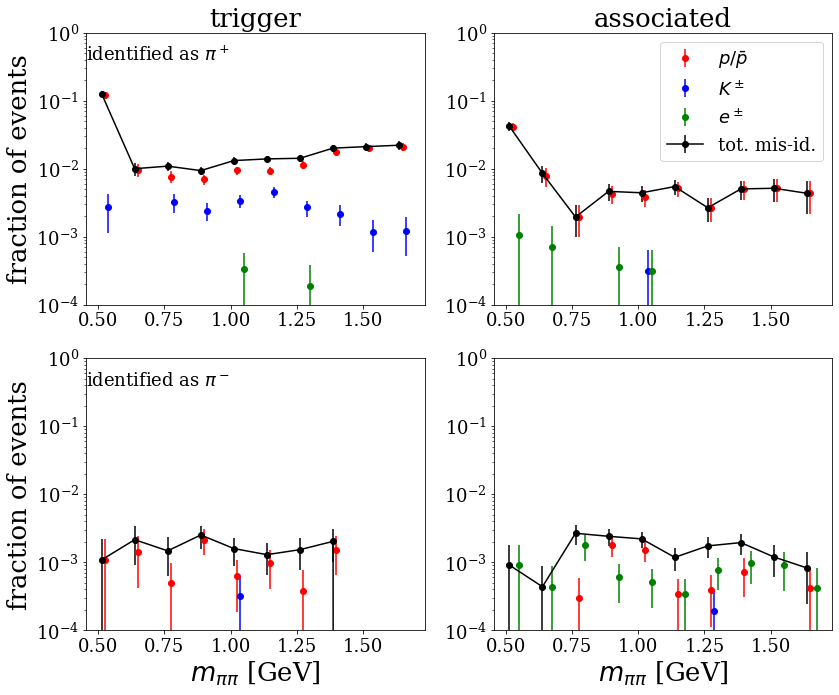

In [136]:
#query = 'h1_p==h1_p'
#query = 'h1_p>.1 and h2_p>.1'
#query = '(h1_th>20 or h1_pid == -211) and (h2_th>20 or h2_pid == -211)'
#minpt=0.0
#query = f'pair_pt > {minpt} and pair_pt >{minpt}'
query = 'h1_z+h2_z<1 and (abs(h1_th-h2_th)>2.40*10/3. or abs(h1_ph-h2_ph)>5.43*10/3.)'

#query='h1_z+h2_z<1 and (h1_th>15 or h1_p>2.7 or h1_pid<0) and (h2_th>15 or h2_pid<0)'
#query = 'dphi > 1'
query = 'h1_z+h2_z<1 and h1_pid*h2_pid<0'
multipanel('dphi',xlabel='$|\Delta\phi|$ [rad]',query=query,slices=np.linspace(0,3.14, 9))
plt.savefig('images/particle_misid/misid_dphi_cm.png',bbox_inches='tight')
plt.show()
#multipanel('dphi_lab',xlabel= '$|\Delta \phi_{\mathrm{lab}}|$ [rad]',query=query)
#plt.savefig('images/particle_misid/misid_dphi_lab.png',bbox_inches='tight')
#plt.show()
#multipanel('drap', xlabel='$\Delta y$',query=query)
#plt.savefig('images/particle_misid/misid_drap.png',bbox_inches='tight')
#plt.show()
multipanel('h1_z', xlabel='$z_1$',query=query,slices=np.linspace(0.5,1, 9))
plt.savefig('images/particle_misid/misid_z1.png',bbox_inches='tight')
plt.show()
multipanel('h2_z', xlabel='$z_2$',query=query,slices=np.linspace(0.05,0.45, 9))
plt.savefig('images/particle_misid/misid_z2.png',bbox_inches='tight')
plt.show()
multipanel('pair_mass', xlabel='$m_{\\pi\\pi}$ [GeV]',query=query + " and h2_z>0.15",slices=np.linspace(0.45,1.7, 11))
plt.savefig('images/particle_misid/misid_pair_mass.png',bbox_inches='tight')
plt.show()


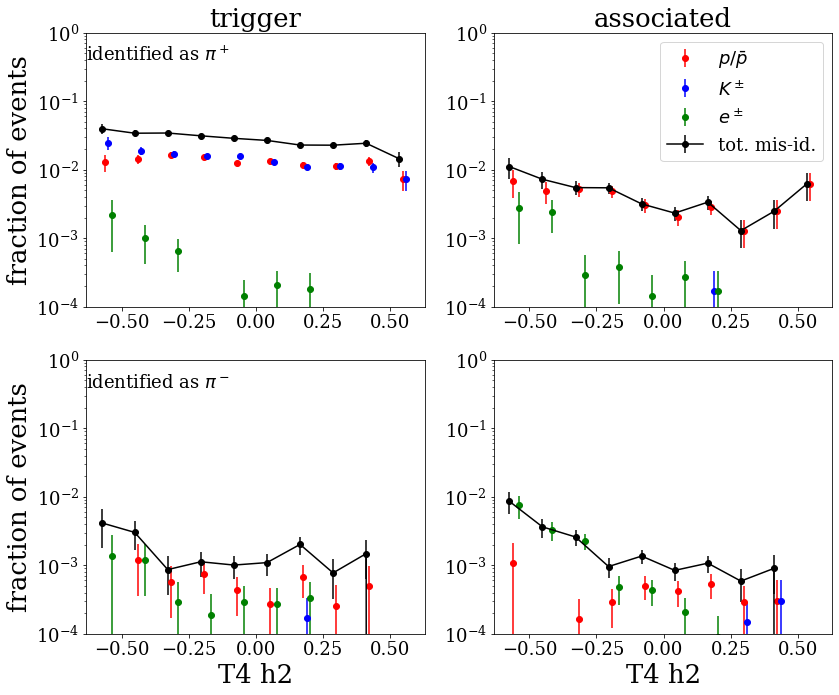

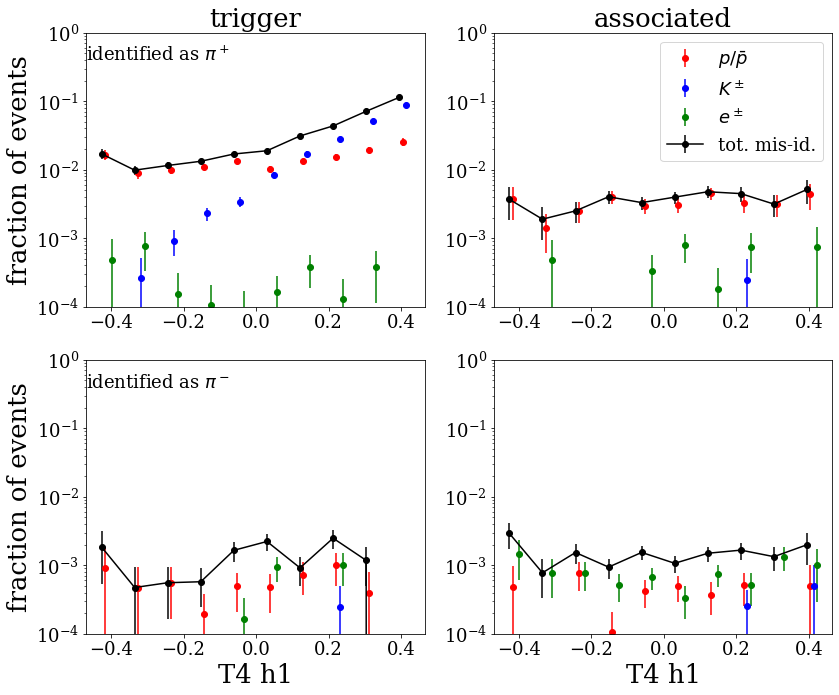

In [137]:
multipanel('h2_T4', xlabel='T4 h2',query=query)
plt.savefig('images/particle_misid/misid_h2_T4_pi.png',bbox_inches='tight')
plt.show()
multipanel('h1_T4', xlabel='T4 h1',query=query)
plt.savefig('images/particle_misid/misid_h1_T4_pi.png',bbox_inches='tight')
plt.show()

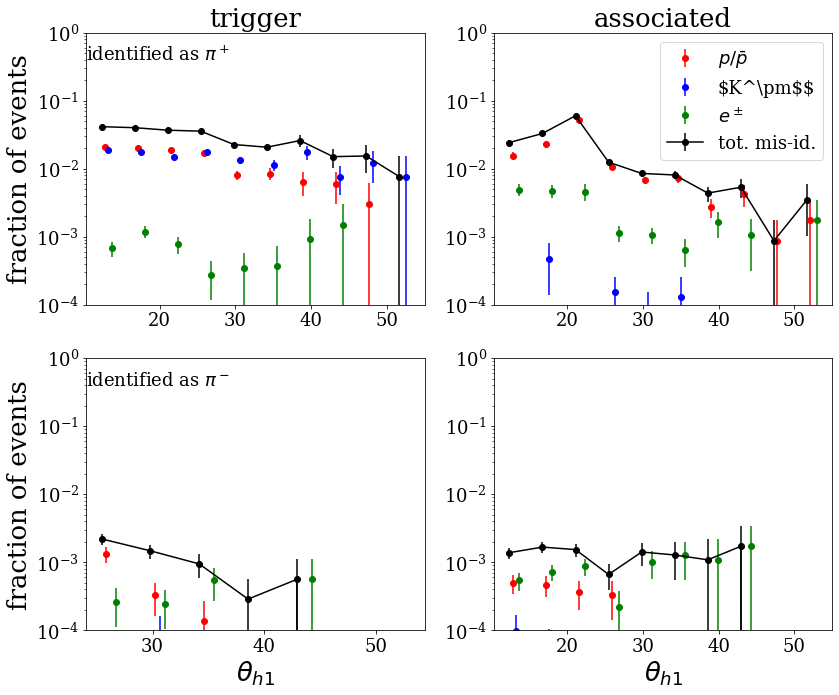

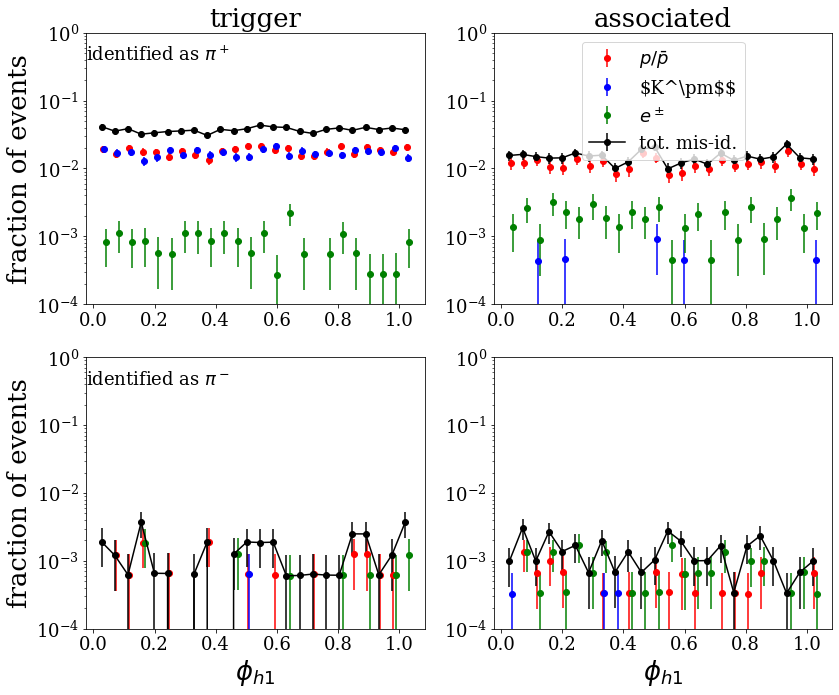

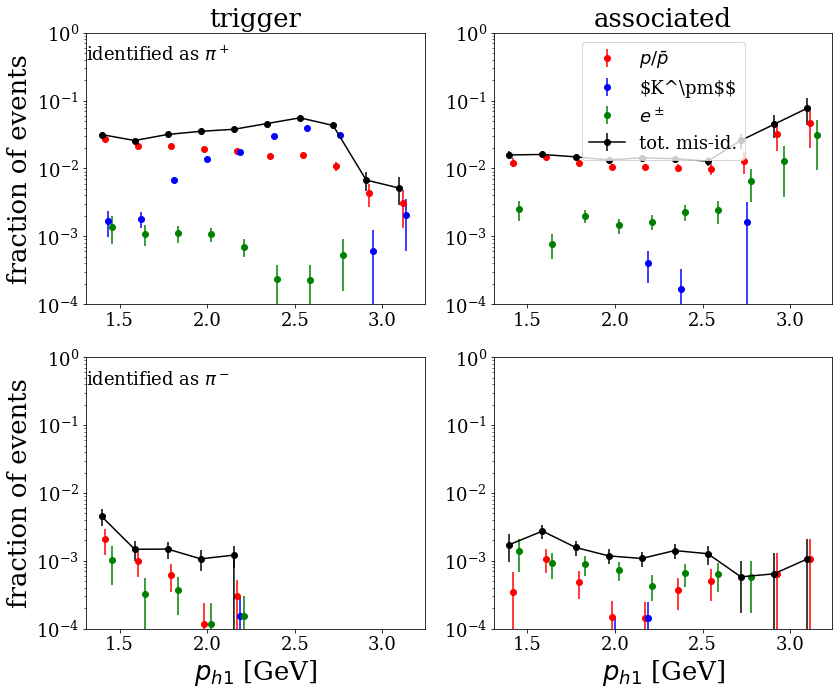

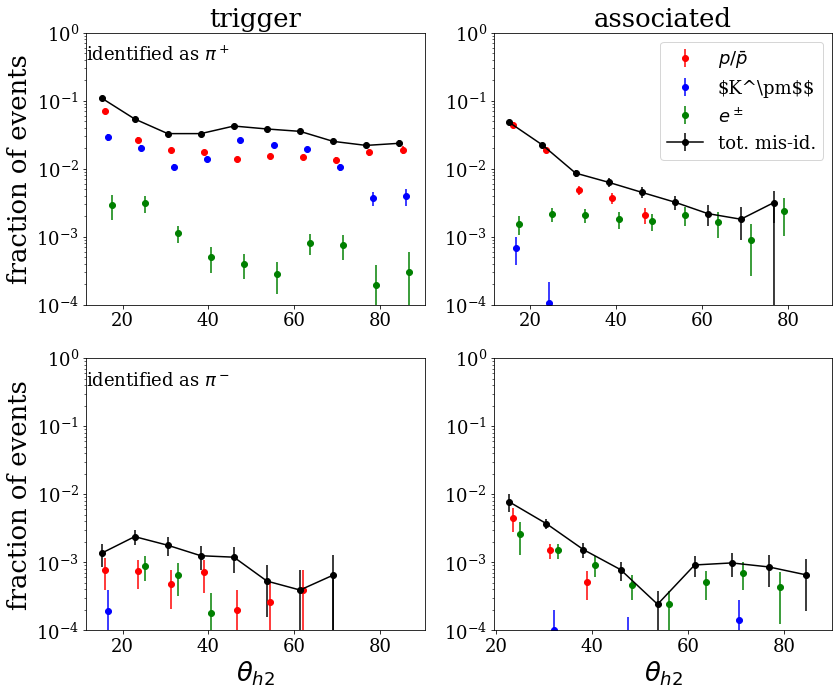

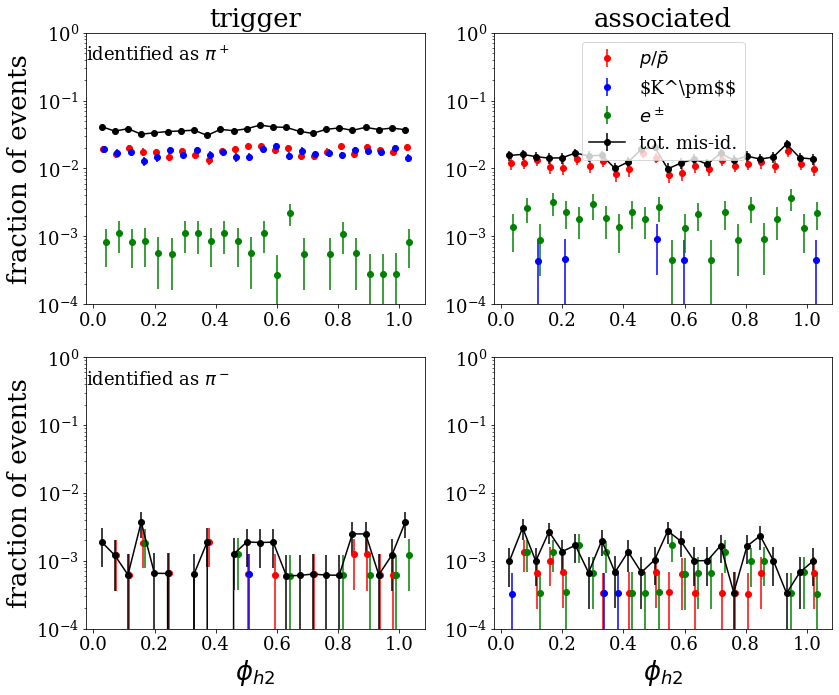

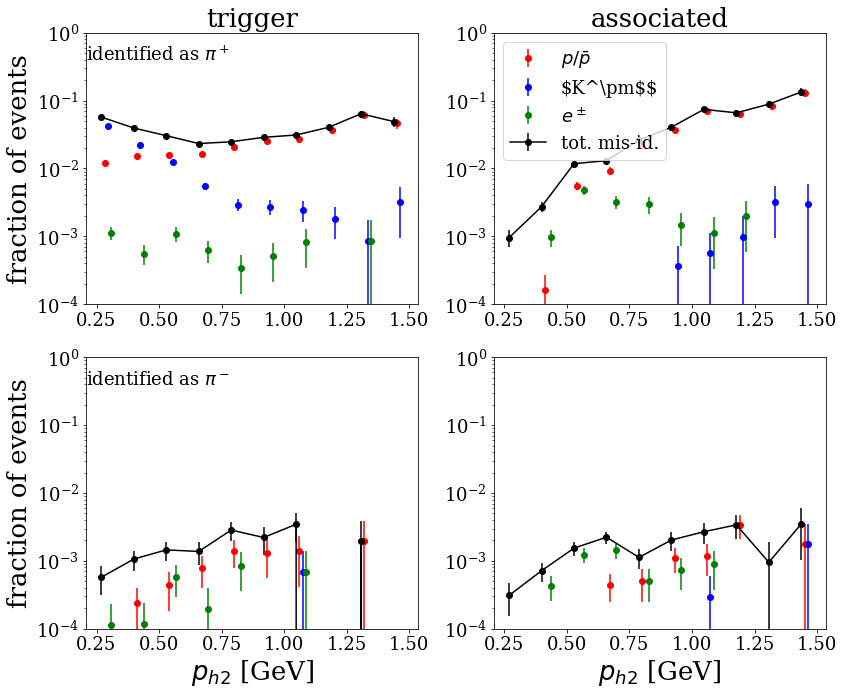

In [50]:
#query = 'h1_FidCut and h2_FidCut'
query = 'h1_p==h1_p'
query = 'h1_z+h2_z<1'
multipanel('h1_th', xlabel='$\\theta_{h1}$',query=query)
plt.savefig('images/particle_misid/misid_h1_th.png',bbox_inches='tight')
plt.show()
multipanel(f'h2_ph%({np.pi/3})', xlabel='$\\phi_{h1}$',query=query,nbins=24)
plt.savefig('images/particle_misid/misid_h1_ph.png',bbox_inches='tight')
plt.show()
multipanel('h1_p', xlabel='$p_{h1}$ [GeV]',query=query)
plt.savefig('images/particle_misid/misid_h1_p.png',bbox_inches='tight')
plt.show()

multipanel('h2_th', xlabel='$\\theta_{h2}$',query=query)
plt.savefig('images/particle_misid/misid_h2_th.png',bbox_inches='tight')
plt.show()
multipanel(f'h2_ph%({np.pi/3})', xlabel='$\\phi_{h2}$',query=query,nbins=24)
plt.savefig('images/particle_misid/misid_h2_ph.png',bbox_inches='tight')
plt.show()
multipanel('h2_p', xlabel='$p_{h2}$ [GeV]',query=query)
plt.savefig('images/particle_misid/misid_h2_p.png',bbox_inches='tight')
plt.show()

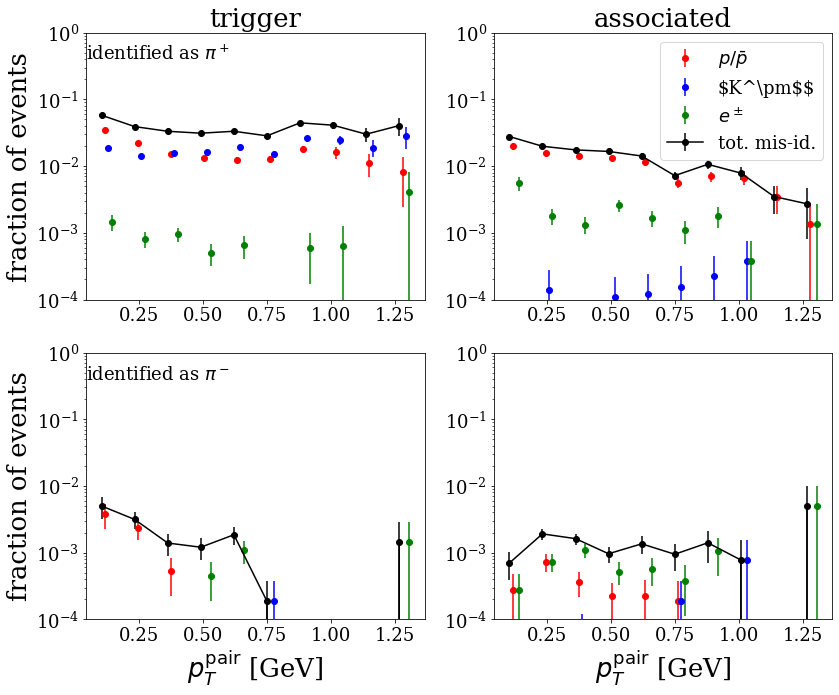

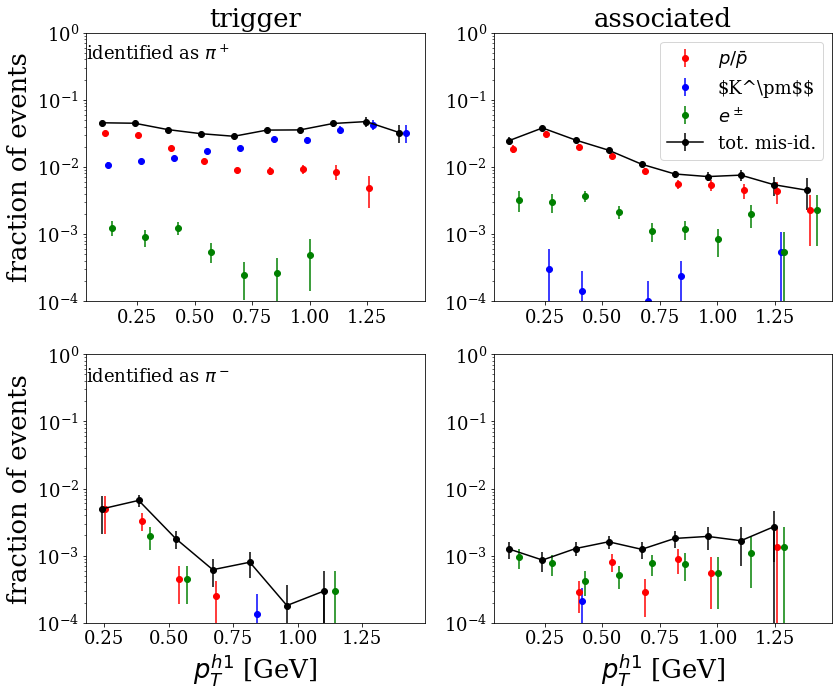

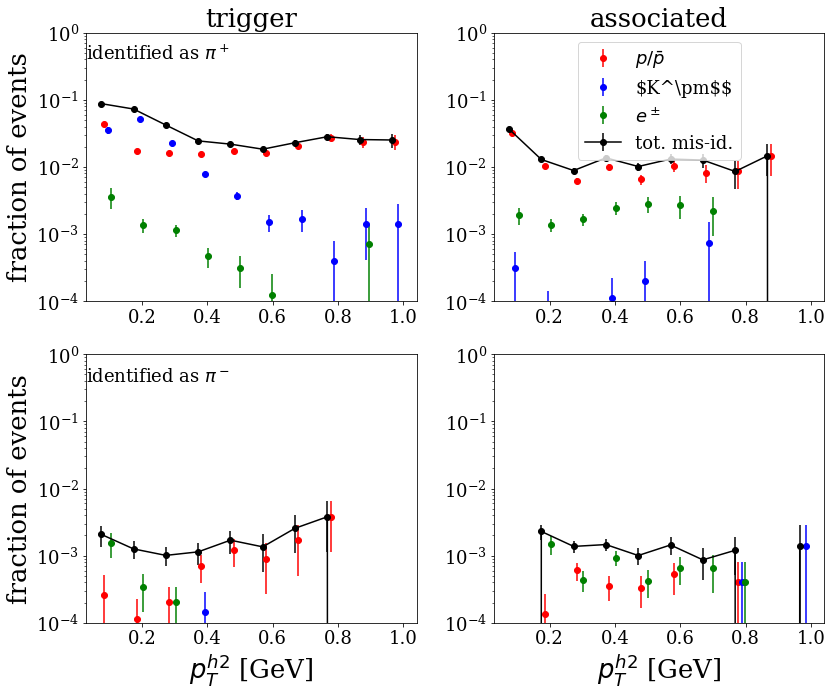

In [51]:
query='h1_z+h2_z<1'
multipanel('pair_pt', xlabel='$p_T^{\\mathrm{pair}}$ [GeV]',query=query)
plt.savefig('images/particle_misid/misid_pair_pt.png',bbox_inches='tight')
plt.show()
query='h1_p==h1_p'
multipanel('h1_cm_pt', xlabel='$p_T^{h1}$ [GeV]',query=query)
plt.savefig('images/particle_misid/misid_h1_cm_pt.png',bbox_inches='tight')
plt.show()
query='h1_p==h1_p'
multipanel('h2_cm_pt', xlabel='$p_T^{h2}$ [GeV]',query=query)
plt.savefig('images/particle_misid/misid_h2_cm_pt.png',bbox_inches='tight')
plt.show()

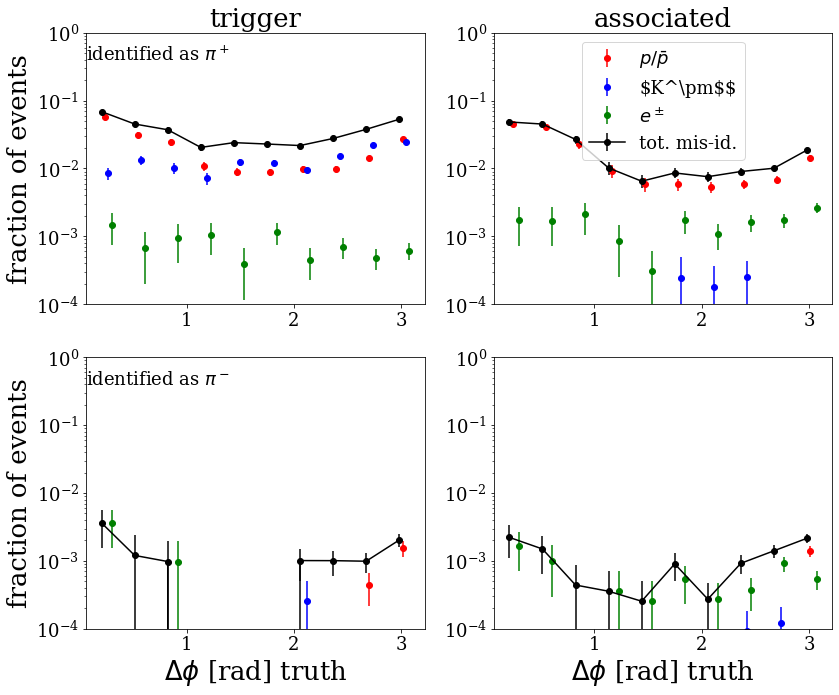

In [52]:
query='h1_z+h2_z<1 and h1_z>h2_z'
multipanel('dphi_truth', xlabel='$\\Delta\\phi$ [rad] truth',query=query)
plt.savefig('images/particle_misid/misid_dphi_truth.png',bbox_inches='tight')
plt.show()

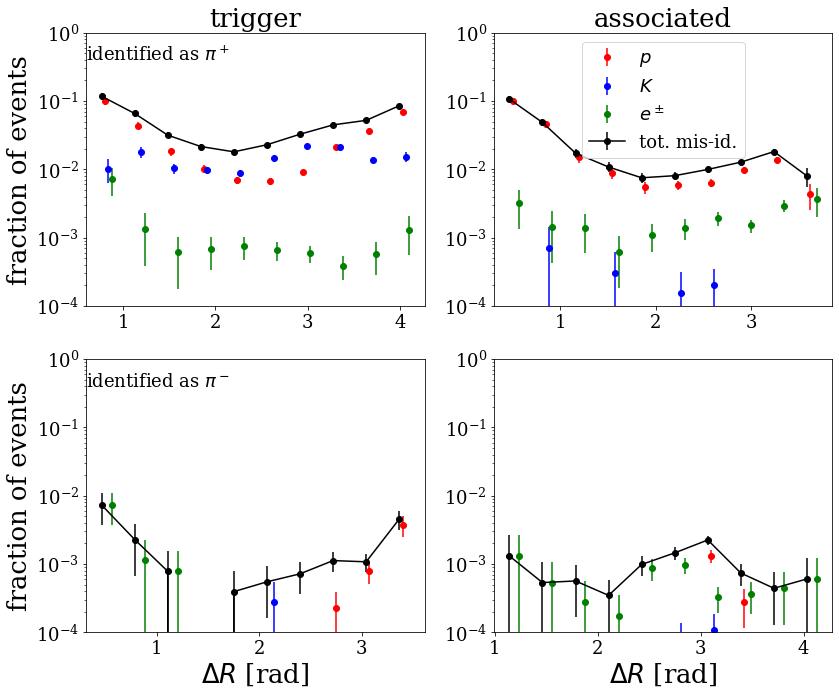

In [166]:
query='h1_z+h2_z<1 and h1_z>h2_z'
multipanel('sqrt(dphi**2+drap**2)', xlabel='$\\Delta R$ [rad]',query=query)
plt.savefig('images/particle_misid/misid_hypot.png',bbox_inches='tight')
plt.show()

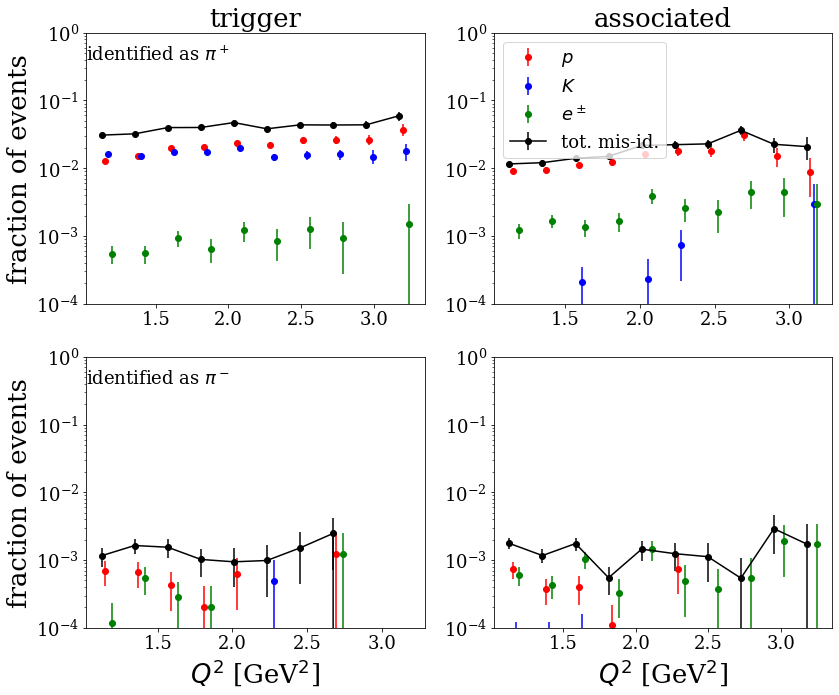

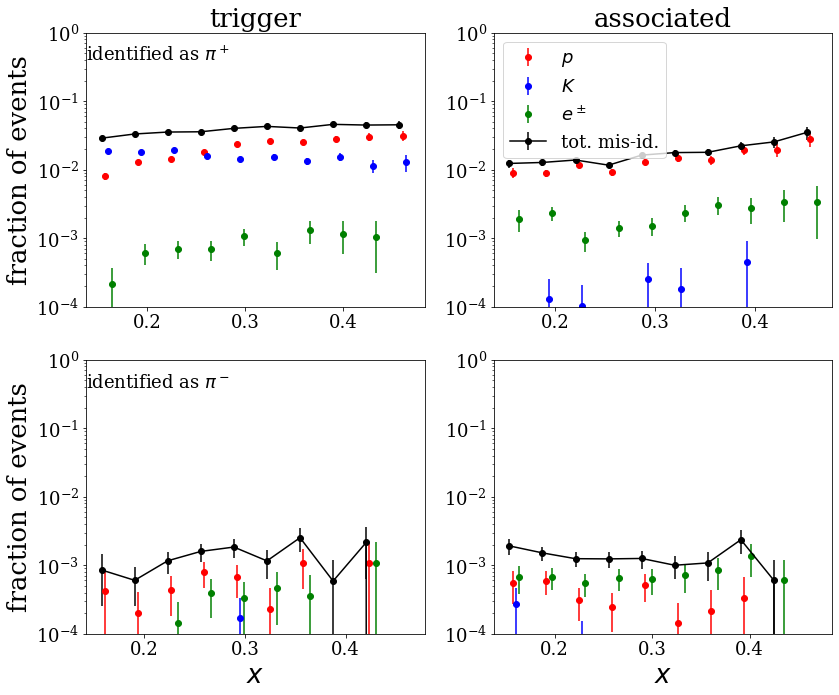

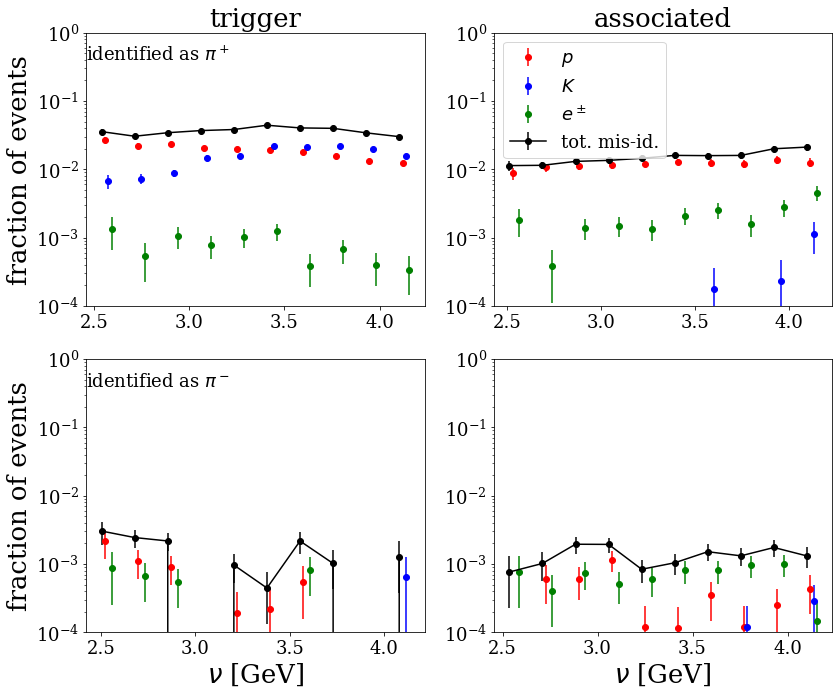

In [168]:
query='h1_z+h2_z<1'
multipanel('Q2', xlabel='$Q^2$ [GeV$^2$]',query=query)
plt.savefig('images/particle_misid/misid_Q2.png',bbox_inches='tight')
plt.show()

query='h1_z+h2_z<1'
multipanel('x', xlabel='$x$',query=query)
plt.savefig('images/particle_misid/misid_x.png',bbox_inches='tight')
plt.show()

query='h1_z+h2_z<1'
multipanel('nu', xlabel='$\\nu$ [GeV]',query=query)
plt.savefig('images/particle_misid/misid_nu.png',bbox_inches='tight')
plt.show()

In [17]:
def frac(df, q, reweight=True):
    if reweight==False:
        d = len(df)
        n = len(df.query(q))
        return n/d, (np.sqrt(n*(d-n))/d**(3/2) if d>0 else 1)
    else:
        d = len(df)
        n = sum(df.query(q).weight_reco)/np.mean(df.weight_reco)
        return n/d, (np.sqrt(n*(d-n))/d**(3/2) if d>0 else 1)
        
def printfrac(txt,df,q,decimals=2):
    f = frac(df,q)
    print(txt + f"   %.{decimals}f+-%.{decimals}f%%"%(f[0]*100,f[1]*100))


df = dfs_mc['D_2pi'].query('h2_truth_pid > -9990 and h2_z>0.07')
printfrac('frac misidentified h2', df,'abs(h2_truth_pid) != 211')
printfrac('frac misidentified h2 pi+', df.query('h2_pid==211'),'abs(h2_truth_pid) != 211')
printfrac('frac misidentified h2 pi-',  df.query('h2_pid==-211'),'abs(h2_truth_pid) != 211')



frac misidentified h2   0.65+-0.02%
frac misidentified h2 pi+   1.54+-0.05%
frac misidentified h2 pi-   0.11+-0.01%


In [29]:

def printstuff(dfq):
    df = dfq.query('h2_truth_pid > -9990 and h1_pid*h2_pid<0')
    printfrac('frac misidentified h2', df,'abs(h2_truth_pid) != 211')
    printfrac('frac misidentified h2 pi+', df.query('h2_pid==211'),'abs(h2_truth_pid) != 211')
    printfrac('frac misidentified h2 pi-',  df.query('h2_pid==-211'),'abs(h2_truth_pid) != 211')
    df = dfq.query('h1_truth_pid > -9990')
    printfrac('frac misidentified h1 tot', df,'abs(h1_truth_pid) != 211')
    printfrac('frac misidentified h1 K', df,'abs(h1_truth_pid) == 321')
    printfrac('frac misidentified h1 p',df,'abs(h1_truth_pid) == 2212')

    printfrac('frac misidentified h1 pi+', df.query('h1_pid==211'),'abs(h1_truth_pid) != 211')
    printfrac('frac misidentified h1 pi+ p', df.query('h1_pid==211'),'abs(h1_truth_pid) == 2212')
    printfrac('frac misidentified h1 pi-', df.query('h1_pid==-211'),'abs(h1_truth_pid) != 211')

    df = dfq.query('h1_truth_pid > -9990 and h2_truth_pid > -9990')
    printfrac('frac at least one misidentified', df,'abs(h1_truth_pid) != 211 or abs(h2_truth_pid) != 211')
    
    
    d = sum(df.weight_reco)
    np = sum(df.query('abs(h1_truth_pid) == 2212 or abs(h2_truth_pid) == 2212').weight_reco)
    nK = sum(df.query('abs(h1_truth_pid) == 321 or abs(h2_truth_pid) == 321').weight_reco)
    nMis = sum(df.query('abs(h1_truth_pid) == 321 or abs(h1_truth_pid) == 2212 or abs(h2_truth_pid) == 2212  or abs(h2_truth_pid) == 321').weight_reco)
    syst_estimate = np/d + nK/d/2
    
    print('at least one proton',np/d)
    print('at least one kaon',nK/d)
    print('at least one other',nMis/d)
    print('systematic error estimate',syst_estimate)
    
    print()
dfq = dfs_mc['D_2pi']
n = len(dfq)
printstuff(dfq)

#query='(h1_th>15 or h1_p>2.7 or h1_pid<0) and (h2_th>15 or h2_pid<0)'
#dfq = dfs_mc['D_2pi'].query(query)
#print(len(dfq)/n)
#printstuff(dfq)

#query='h1_z+h2_z<1 and (h1_th>15 or h1_p>2.7 or h1_pid<0) and (h2_th>15 or h2_pid<0)'
#dfq = dfs_mc['D_2pi'].query(query)
#print(len(dfq)/n)
#printstuff(dfq)

query='h1_z+h2_z<1'
dfq = dfs_mc['D_2pi'].query(query)
print(len(dfq)/n)
printstuff(dfq)

query='h1_z+h2_z<1 and h1_pid*h2_pid<0'
dfq = dfs_mc['D_2pi'].query(query)
print(len(dfq)/n)
printstuff(dfq)



frac misidentified h2   0.16+-0.01%
frac misidentified h2 pi+   0.30+-0.03%
frac misidentified h2 pi-   0.11+-0.01%
frac misidentified h1 tot   2.81+-0.05%
frac misidentified h1 K   1.45+-0.03%
frac misidentified h1 p   1.27+-0.03%
frac misidentified h1 pi+   3.57+-0.06%
frac misidentified h1 pi+ p   1.61+-0.04%
frac misidentified h1 pi-   0.14+-0.02%
frac at least one misidentified   3.37+-0.05%
at least one proton 0.017759156992022466
at least one kaon 0.014282922570404796
at least one other 0.031899847329568964
systematic error estimate 0.024900618277224864

1.0
frac misidentified h2   0.16+-0.01%
frac misidentified h2 pi+   0.30+-0.03%
frac misidentified h2 pi-   0.11+-0.01%
frac misidentified h1 tot   2.81+-0.05%
frac misidentified h1 K   1.45+-0.03%
frac misidentified h1 p   1.27+-0.03%
frac misidentified h1 pi+   3.57+-0.06%
frac misidentified h1 pi+ p   1.61+-0.04%
frac misidentified h1 pi-   0.14+-0.02%
frac at least one misidentified   3.37+-0.05%
at least one proton 0.017759

In [19]:
query='pair_mass>0.5 and h1_z+h2_z>0.99 and h1_truth_pid>-500 and h2_truth_pid>-500'
dfq = dfs_mc['D_2pi'].query(query)
print(len(dfq.query('abs(h1_truth_pid)!=211 or abs(h2_truth_pid)!=211'))/len(dfq))

0.11849710982658959


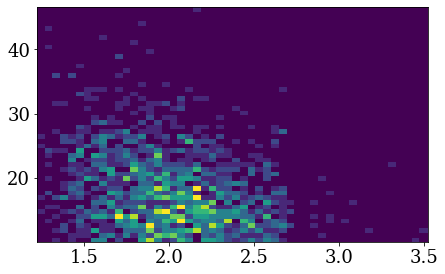

(array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 1.],
        [0., 0., 0., ..., 2., 3., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0.20001963, 0.23119395, 0.26236827, 0.29354258, 0.3247169 ,
        0.35589122, 0.38706553, 0.41823985, 0.44941417, 0.48058848,
        0.5117628 , 0.54293711, 0.57411143, 0.60528575, 0.63646006,
        0.66763438, 0.6988087 , 0.72998301, 0.76115733, 0.79233165,
        0.82350596, 0.85468028, 0.8858546 , 0.91702891, 0.94820323,
        0.97937755, 1.01055186, 1.04172618, 1.0729005 , 1.10407481,
        1.13524913, 1.16642345, 1.19759776, 1.22877208, 1.2599464 ,
        1.29112071, 1.32229503, 1.35346935, 1.38464366, 1.41581798,
        1.4469923 , 1.47816661, 1.50934093, 1.54051525, 1.57168956,
        1.60286388, 1.6340382 , 1.66521251, 1.69638683, 1.72756115,
        1.75873546]),
 array([10.02301216, 11.6195499 , 13.21608765, 14

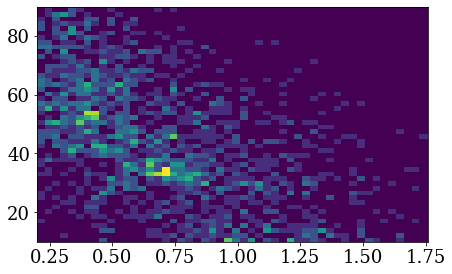

In [20]:
dfq=dfs_mc['D_2pi'].query('h1_truth_pid ==2212')
plt.hist2d(dfq.h1_p,dfq.h1_th,bins=50)
plt.show()
plt.hist2d(dfq.h2_p,dfq.h2_th,bins=50)


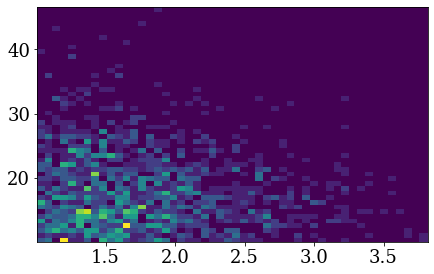

(array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 1.],
        [0., 0., 0., ..., 2., 3., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0.20001963, 0.23119395, 0.26236827, 0.29354258, 0.3247169 ,
        0.35589122, 0.38706553, 0.41823985, 0.44941417, 0.48058848,
        0.5117628 , 0.54293711, 0.57411143, 0.60528575, 0.63646006,
        0.66763438, 0.6988087 , 0.72998301, 0.76115733, 0.79233165,
        0.82350596, 0.85468028, 0.8858546 , 0.91702891, 0.94820323,
        0.97937755, 1.01055186, 1.04172618, 1.0729005 , 1.10407481,
        1.13524913, 1.16642345, 1.19759776, 1.22877208, 1.2599464 ,
        1.29112071, 1.32229503, 1.35346935, 1.38464366, 1.41581798,
        1.4469923 , 1.47816661, 1.50934093, 1.54051525, 1.57168956,
        1.60286388, 1.6340382 , 1.66521251, 1.69638683, 1.72756115,
        1.75873546]),
 array([10.02301216, 11.6195499 , 13.21608765, 14

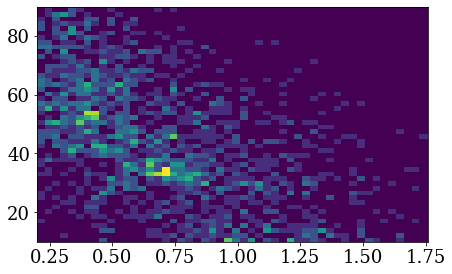

In [21]:
dfq=dfs_mc['D_2pi'].query('h1_truth_pid ==2212')
plt.hist2d(dfq.Q2,dfq.h1_th,bins=50)
plt.show()
plt.hist2d(dfq.h2_p,dfq.h2_th,bins=50)

In [177]:
df = dfs_mc['D_2pi'].query("h1_z+h2_z<1")
print(min(df.nu),max(df.nu))
print(min(df.Q2),max(df.Q2))
print(min(df.h2_z),max(df.h2_z))

2.3189475536346436 4.19992733001709
1.0000636577606201 3.818652868270874
0.05838474320468593 0.4984680480027739


In [ ]:
plt.hist2d(df.h2_z, df.Q2,bins=100)

In [ ]:
printfrac("h2_th>90", df, "h2_th>90")

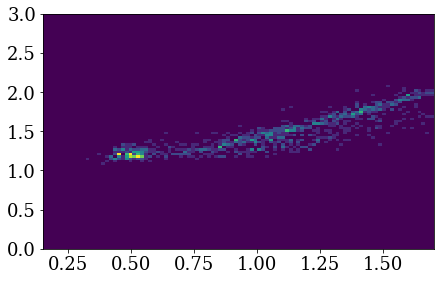

Text(0.5, 0, 'truth pair mass, $\\pi p$ [GeV]')

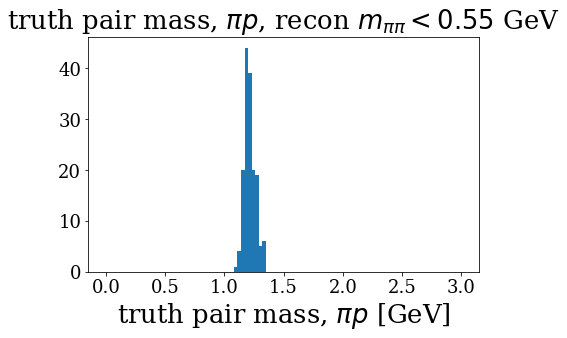

In [132]:
df = dfs_mc['D_2pi'].query("h1_z+h2_z<1 and h1_pid*h2_pid<0")# and pair_mass<0.55 and h2_z>0.15")
dfq = df.query('abs(h1_truth_pid) == 2212')
#plt.hist(df.eval("pair_mass_truth"),bins=100,range=(0,3))
plt.hist2d(dfq.eval("pair_mass"),dfq.eval("pair_mass_truth"),bins=100,range=((0.15,1.7),(0,3)))
#plt.hist(dfq.h2_z,bins=30)
plt.show()
#plt.hist(dfq.eval("pair_mass_truth"),bins=100, range=(0,3))
plt.hist(dfq.query("pair_mass<0.55").eval("pair_mass_truth"),bins=100, range=(0,3))
plt.gca().set_title("truth pair mass, $\pi p$, recon $m_{\pi\pi}<0.55$ GeV")
plt.gca().set_xlabel("truth pair mass, $\pi p$ [GeV]")

#print(np.mean(dfq.query("pair_mass<0.55 and pair_mass_truth<10").eval("pair_mass_truth")))
#print(np.mean(dfq.query("pair_mass<0.55 and pair_mass_truth<10").eval("pair_mass_truth")))

In [74]:
print(list(df.columns))

['dphi', 'dphi_lab', 'drap', 'h1_z', 'h2_z', 'h1_cm_pt', 'h2_cm_pt', 'h1_xf', 'h2_xf', 'h1_rap', 'ycm', 'h2_rap', 'h1_pid', 'h2_pid', 'h1_cm_ph', 'h2_cm_ph', 'h1_cm_th', 'h2_cm_th', 'pair_mass', 'pair_pt', 'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 't', 'Q2', 'nu', 'W', 'SampFracEl25', 'SampFracEl20', 'TargTypeSM', 'TargType', 'x', 'u', 'h1_ph', 'h1_th', 'h2_ph', 'h2_th', 'h1_deltaZ', 'h2_deltaZ', 'h1_Nphe', 'h2_Nphe', 'h1_Sector', 'h2_Sector', 'h1_FidCut', 'h2_FidCut', 'h1_FidCutPiPlus', 'h2_FidCutPiPlus', 'h1_Chi2CC', 'h2_Chi2CC', 'h1_StatCC', 'h2_StatCC', 'h1_Betta', 'h2_Betta', 'h1_T4', 'h2_T4', 'evnt', 'dphi_truth', 'dphi_lab_truth', 'drap_truth', 'h1_truth_z', 'h2_truth_z', 'h1_truth_cm_pt', 'h2_truth_cm_pt', 'h1_truth_xf', 'h2_truth_xf', 'h1_truth_rap', 'ycm_truth', 'h2_truth_rap', 'h1_truth_pid', 'h2_truth_pid', 'h1_truth_cm_ph', 'h2_truth_cm_ph', 'h1_truth_cm_th', 'h2_truth_cm_th', 'pair_mass_truth', 'pair_pt_truth', 'mx_eh1h2x_truth', 'mx_eh1x_truth', 'mx_eh2x_truth', 't_truth', 'Q2_

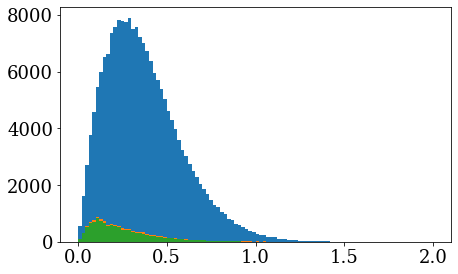

In [103]:
df = dfs_mc['D_pi_p']#.query("h2_p>2.7")
f = "pair_pt"
b = np.linspace(0,2,101)
plt.hist(df.eval(f),bins=b)
plt.hist(df.query("abs(h1_truth_pid)!=211").eval(f), bins=b)
plt.hist(df.query("abs(h1_truth_pid)==321").eval(f), bins=b)
plt.show()




In [148]:
dfpr = dfs_mc['D_pi_p'].query("h1_pid==h1_truth_pid and h2_pid==h2_truth_pid")
dfpi = dfs_mc['D_2pi'].query("h1_pid==h1_truth_pid and h2_pid==h2_truth_pid")

def print_resolutions(df,var, truth_var, partitions):
    print(var)
    for i in range(len(partitions)-1):
        dfq = df.query(f"{var}>{partitions[i]} and {var}<{partitions[i+1]}")
        #if 'pass_recon' in df.keys():
        df = df.query('h1_z>0.5 and h2_z>0 and h1_truth_z>0.5 and h2_truth_z>0')
        s=np.std(dfq.eval(f"{var}-({truth_var})"))
        dfq = dfq.query(f"abs({var}-({truth_var}))<{3*s}")
        s=np.std(dfq.eval(f"{var}-({truth_var})"))
       
        print(partitions[i],partitions[i+1],s,s/(partitions[i+1]-partitions[i]))
print_resolutions(dfpr,"drap","drap_truth", np.linspace(0,2.5,6))
print_resolutions(dfpi,"drap","drap_truth", np.linspace(0,2.5,6))
print_resolutions(dfpr,"dphi","dphi_truth", np.linspace(0,np.pi,5))
print_resolutions(dfpi,"dphi","dphi_truth", np.linspace(0,np.pi,5))
print_resolutions(dfpr,"drap**2+dphi**2","drap_truth**2+dphi_truth**2", np.linspace(0,15,11))
print_resolutions(dfpi,"drap**2+dphi**2","drap_truth**2+dphi_truth**2", np.linspace(0,15,11))
print_resolutions(dfpr,"sqrt(drap**2+dphi**2)","sqrt(drap_truth**2+dphi_truth**2)", np.linspace(0,4,11))
print_resolutions(dfpi,"sqrt(drap**2+dphi**2)","sqrt(drap_truth**2+dphi_truth**2)", np.linspace(0,4,11))

drap
0.0 0.5 0.007250121452887999 0.014500242905775998
0.5 1.0 0.008963128030564963 0.017926256061129926
1.0 1.5 0.011989488357484236 0.023978976714968472
1.5 2.0 0.0165708740728543 0.0331417481457086
2.0 2.5 0.020817280445475702 0.041634560890951404
drap
0.0 0.5 0.011117681827417689 0.022235363654835378
0.5 1.0 0.011488058244374471 0.022976116488748942
1.0 1.5 0.012797734036588848 0.025595468073177696
1.5 2.0 0.01543058207083209 0.03086116414166418
2.0 2.5 0.0191959694095205 0.038391938819041
dphi
0.0 0.7853981633974483 0.09250863597057808 0.11778565354724974
0.7853981633974483 1.5707963267948966 0.06988096353227691 0.08897520619349075
1.5707963267948966 2.356194490192345 0.04895848528190906 0.06233587951126106
2.356194490192345 3.141592653589793 0.027360338491669328 0.034836264924933004
dphi
0.0 0.7853981633974483 0.05689536500701251 0.07244142863906952
0.7853981633974483 1.5707963267948966 0.04516897648117777 0.05751092705104806
1.5707963267948966 2.356194490192345 0.031195736432324

(array([  0.,   3.,   4.,   1.,   4.,   2.,   3.,   2.,   0.,   2.,   0.,
          2.,   1.,   6.,   2.,   1.,   2.,   2.,   3.,   6.,   3.,   6.,
          5.,   2.,   8.,   7.,   4.,   4.,  10.,   9.,   7.,   8.,  23.,
         15.,  23.,  26.,  36.,  27.,  38.,  41.,  52.,  69.,  87., 111.,
        146., 126., 154., 187., 220., 216., 193., 200., 161., 170., 119.,
        108.,  89.,  77.,  69.,  48.,  46.,  42.,  21.,  28.,  13.,  15.,
         20.,  14.,   8.,   9.,   7.,  13.,   4.,   6.,   8.,   2.,   6.,
          6.,   3.,   3.,   2.,   7.,   2.,   4.,   3.,   3.,   3.,   4.,
          3.,   2.,   2.,   3.,   1.,   2.,   0.,   1.,   2.,   0.,   1.,
          1.]),
 array([-0.1  , -0.098, -0.096, -0.094, -0.092, -0.09 , -0.088, -0.086,
        -0.084, -0.082, -0.08 , -0.078, -0.076, -0.074, -0.072, -0.07 ,
        -0.068, -0.066, -0.064, -0.062, -0.06 , -0.058, -0.056, -0.054,
        -0.052, -0.05 , -0.048, -0.046, -0.044, -0.042, -0.04 , -0.038,
        -0.036, -0.034, -0.032

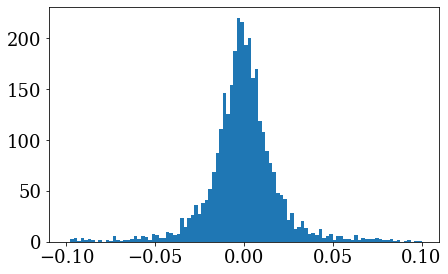

In [149]:

plt.hist(dfpi.query('dphi>0 and dphi<0.785 and h1_cm_pt>0.2 and h2_cm_pt>0.2').eval("dphi-dphi_truth"),bins=100,range=(-0.1,0.1))